In [1]:
import sys
sys.path.append('/home/jovyan/workspace')

In [2]:
import planetengine
import modelscripts

In [3]:
# import underworld as uw
# from underworld import function as fn
# from underworld.function._function import Function as _Function

# ### This is a working example
# ### of a custom-made Underworld function!

# class Clip(_Function):
#     # this function will take the input
#     # and normalise it over an interval
#     def __init__(self, inFn, lBnd, uBnd, *args, **kwargs):

#         # Sanitising the inputs:

#         _inFn = _Function.convert(inFn)
#         if _inFn == None:
#             raise ValueError( "Provided 'inFn' must a 'Function' or convertible type.")
#         self._inFn = _inFn

#         _lBnd = _Function.convert(lBnd)
#         if _lBnd == None:
#             raise ValueError( "Provided 'lBnd' must a 'Function' or convertible type.")
#         self._lBnd = _lBnd

#         _uBnd = _Function.convert(uBnd)
#         if _uBnd == None:
#             raise ValueError( "Provided 'uBnd' must a 'Function' or convertible type.")
#         self._uBnd = _uBnd

#         # Building the actual function:
        
#         _clipFn = fn.branching.conditional([
#             (self._inFn < self._lBnd, self._lBnd),
#             (self._inFn > self._uBnd, self._uBnd),
#             (True, self._inFn)
#             ])
#         self._clipFn = _clipFn

#         # Setting the attribute for the underlying 'c' object:

#         self._fncself = self._clipFn._fncself

#         # Building the parent:

#         super(Clip, self).__init__(argument_fns = [_inFn, _lBnd, _uBnd], **kwargs)

In [4]:
system = modelscripts.arrhenius.build()
planetengine.initials.apply(
    {'temperatureField': planetengine.initials.sinusoidal.IC(freq = 1.)},
    system,
    )
system.solve()

Fitted 1 variables to the figure.



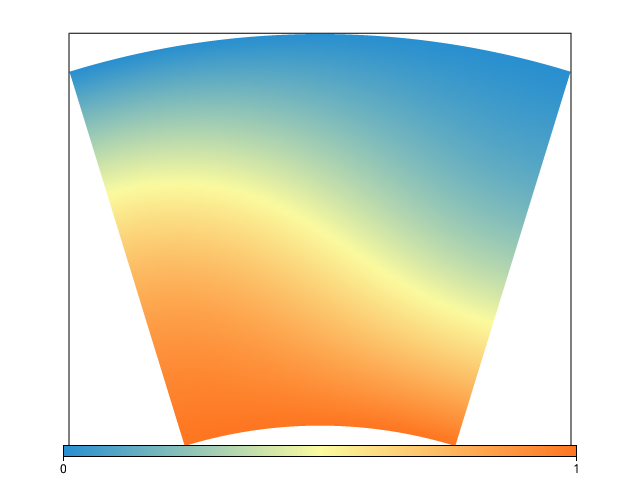

In [5]:
planetengine.quickShow(system.temperatureField)

In [6]:
# myfn = Clip(system.temperatureField, 0.2, 0.8)

In [7]:
# myfn.evaluate(system.mesh)

In [8]:
# planetengine.quickShow(myfn)

In [9]:
import underworld as uw
from underworld import function as fn
from underworld.function._function import Function as _Function
from planetengine.utilities import stringify

In [12]:
stringify([1, ('a', 2.), {'c': (3, 3, 3.)}])

'tup{int{1}tup{str{a}flt{2.0}}dct{str{c}tup{int{3}int{3}flt{3.0}}}}'

In [13]:
uwNamesToFns = {
    'pow': fn.math.pow,
    'abs': fn.math.abs,
    'cosh': fn.math.cosh,
    'acosh': fn.math.acosh,
    'tan': fn.math.tan,
    'asin': fn.math.asin,
    'log': fn.math.log,
    'atanh': fn.math.atanh,
    'sqrt': fn.math.sqrt,
    'abs': fn.math.abs,
    'log10': fn.math.log10,
    'sin': fn.math.sin,
    'asinh': fn.math.asinh,
    'log2': fn.math.log2,
    'atan': fn.math.atan,
    'sinh': fn.math.sinh,
    'cos': fn.math.cos,
    'tanh': fn.math.tanh,
    'erf': fn.math.erf,
    'erfc': fn.math.erfc,
    'exp': fn.math.exp,
    'acos': fn.math.acos,
    'dot': fn.math.dot,
    'add': fn._function.add,
    'subtract': fn._function.subtract,
    'multiply': fn._function.multiply,
    'divide': fn._function.divide,
    'greater': fn._function.greater,
    'greater_equal': fn._function.greater_equal,
    'less': fn._function.less,
    'less_equal': fn._function.less_equal,
    'logical_and': fn._function.logical_and,
    'logical_or': fn._function.logical_or,
    'logical_xor': fn._function.logical_xor,
    'input': fn._function.input,
    'constant': fn.misc.constant
    }
uwFnsToNames = {val: key for key, val in uwNamesToFns.items()}

In [14]:
planetengine.utilities

<module 'planetengine.utilities' from '/home/jovyan/workspace/planetengine/utilities.py'>

In [23]:
type(fn.misc.constant(1)) == fn.misc.constant

True

In [24]:
dir(fn.misc.constant(1))

['_GetIOForPyInput',
 '__abstractmethods__',
 '__add__',
 '__and__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__le__',
 '__lt__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__or__',
 '__pow__',
 '__radd__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__rmul__',
 '__rsub__',
 '__rtruediv__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__sub__',
 '__subclasshook__',
 '__truediv__',
 '__weakref__',
 '__xor__',
 '_abc_cache',
 '_abc_negative_cache',
 '_abc_negative_cache_version',
 '_abc_registry',
 '_evaluate_data_convert_to_ndarray',
 '_fncself',
 '_fncselfpriv',
 '_ioguy',
 '_underlyingDataItems',
 '_value',
 'convert',
 'evaluate',
 'evaluate_global',
 'integrate',
 'value']

In [15]:
def convert(argument):
    _argument = _Function.convert(argument)
    if _argument is None:
        raise ValueError(
            "Provided functions must be Underworld functions \
            or convertible types."
            )
    if not hasattr(_argument, '_opTag'):
        try:
            _argument._opTag = stringify(argument)
        except:
            _argument = Base(_argument, 'Anon')
    return _argument

In [16]:
def make_opTag(argument_fns):
    inTags = [arg._opTag for arg in argument_fns]
    opTags = '{' + ';'.join(inTags) + '}'
    return opTags

In [17]:
class Base(_Function):
    '''
    Creates a new function
    that passively 'hosts' the input function
    but sets it as a 'base'
    for future functions to chain from;
    most importantly, sets a new 'opTag'.
    '''

    _opTag = 'Base'

    def __init__(self, inFn, name, *args, **kwargs):

        # Sanitise the inputs:
        if not type(name) == str:
            raise Exception
        badchars = '{}_-;'
        if any([badchar in name for badchar in badchars]):
            raise Exception

        # Building the function:

        _inFn = _Function.convert(inFn)
        if _inFn is None:
            raise ValueError(
                "Provided functions must be Underworld functions \
                or convertible types."
                )

        # Setting important attributes:

        self._argument_fns = [_inFn]
        self._fncself = _inFn._fncself
        self._opTag = name + '{}'

        # Building the parent:

        super(Base, self).__init__(self._argument_fns, **kwargs)

In [18]:
class Clip(_Function):
    '''
    This function will take the input \
    and normalise it over an interval.
    '''

    _opTag = 'Clip'

    def __init__(self, inFn, lBnd, uBnd, *args, **kwargs):

        # Sanitising the inputs:

        _inFn, _lBnd, _uBnd = [convert(arg) for arg in [inFn, lBnd, uBnd]]

        # Building the function:

        _clipFn = fn.branching.conditional([
            (_inFn < _lBnd, _lBnd),
            (_inFn > _uBnd, _uBnd),
            (True, _inFn)
            ])

        # Setting important attributes:

        self._argument_fns = [_inFn, _lBnd, _uBnd]
        self._fncself = _clipFn._fncself
        self._opTag = 'Clip' + make_opTag(self._argument_fns)

        # Building the parent:

        super(Clip, self).__init__(self._argument_fns, **kwargs)

In [19]:
rootFn = Base(system.viscosityFn, 'viscosityFn')

In [20]:
rootFn._opTag

'viscosityFn{}'

In [21]:
clipFn = Clip(system.viscosityFn, 0.2, 0.8)

In [22]:
clipFn._opTag

'Clip{Anon{};flt{0.2};flt{0.8}}'

In [ ]:
str(type('a'))